In [2]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ, ClassicalRegister, QuantumRegister
from qiskit.compiler import transpile, assemble
import numpy as np
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)

In [4]:
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_qasm_simulator')

job_id = "5dd3f938bbd54600187e3578"
job = backend.retrieve_job(job_id)

result = job.result()
count = result.get_counts()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


In [5]:
count_sorted = sorted(count.items(), key=lambda x:x[1], reverse=True)

# collect answers with Top 7 probability
ans_list = count_sorted[:12]

# reverse ans_list
ans_reversed = []
for i in ans_list:
    ans_temp=[i[0][::-1],i[1]]
    ans_reversed.append(ans_temp)

# convert each 2 bits into corresponding color. Add node0(0),node3(1),node8(2) and node11(3)
ans_shaped = []
for j in ans_reversed:
    ans_temp=j[0]
    node0 = int(ans_temp[0] + ans_temp[1], 2)
    node1 = int(ans_temp[2] + ans_temp[3], 2)
    node2 = int(ans_temp[4] + ans_temp[5], 2)
    node3 = int(ans_temp[6] + ans_temp[7], 2)
    node4 = int(ans_temp[8] + ans_temp[9], 2)
    node5 = int(ans_temp[10] + ans_temp[11], 2)
    node6 = int(ans_temp[12] + ans_temp[13], 2)
    node7 = int(ans_temp[14] + ans_temp[15], 2)
    nodes_color = str(node0) + str(node1) + str(node2) + str(node3) + str(node4) + str(node5) + str(node6) + str(node7) 
    ans_shaped.append([nodes_color,j[1]])
sorted(ans_shaped)

[['20121220', 524],
 ['20122222', 34],
 ['20221220', 31],
 ['20221222', 45],
 ['20222222', 34],
 ['22121220', 43],
 ['22121222', 28],
 ['22122222', 33],
 ['22221220', 40],
 ['22221222', 29],
 ['22222220', 29],
 ['22222222', 35]]

{'33332331': 40, '33233333': 33, '33233331': 22, '31333333': 34, '33333333': 35, '31233331': 26, '33232331': 43, '31233333': 34, '33232333': 28, '31232333': 21, '31332331': 31, '31232331': 524, '31332333': 45, '31333331': 26, '33333331': 29, '33332333': 29}


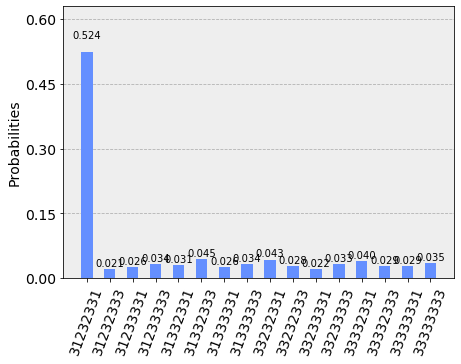

In [6]:
# 10進数(1~4)に変換
def convert_to_decimal(str_bin):
    str_bin = ''.join(list(reversed(str_bin)))  # cbitに格納されるときに順番逆になっていることに注意
    list_dec = [str(int(str_bin[2*i:2*i+2], 2)+1) for i in range(len(str_bin)//2)]
    str_dec = ''.join(list_dec)
    return str_dec
# histogram plot (decimal representation)
count_decimal = {}
for key, value in count.items():
    count_decimal[convert_to_decimal(key)] = value
print(count_decimal)
plot_histogram(count_decimal)